# EDA and Data Story

## Uploading Modules

In [1]:
import os
import tweepy as tw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

## Importing Data

In [2]:
active20=pd.read_csv("active20-clean.csv")
active19=pd.read_csv("active19-clean.csv")
lazy20=pd.read_csv("lazy20-clean.csv")
lazy19=pd.read_csv("lazy19-clean.csv")
twitter_users = pd.read_csv("Twitter users.csv")

## User Cohorts

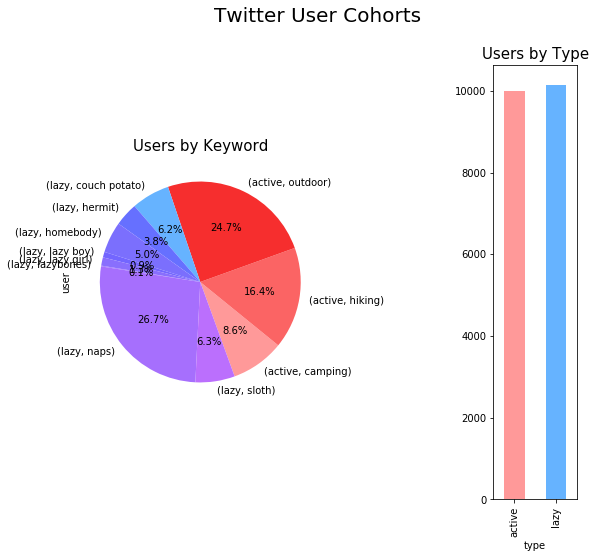

In [3]:
from matplotlib import gridspec

fig = plt.figure(figsize=(9, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
_ = plt.suptitle('Twitter User Cohorts', fontsize=20)

ax0 = plt.subplot(gs[0])
colors=['#ff9999','#fb6464','#f62e2e','#66b3ff','#6670ff','#7b6ffd','#7366ff','#896ffd',
        '#986ffd','#a66ffd','#bb6ffd']
_ = twitter_users.groupby(['type','keyword']).user.count().plot.pie(colors=colors,autopct='%1.1f%%', startangle=-70, ax=ax0)
_ = plt.title('Users by Keyword', fontsize=15)

ax1 = plt.subplot(gs[1])
cols = ['#ff9999','#66b3ff']
_ = twitter_users.groupby(['type']).user.count().plot.bar(color=cols, ax=ax1)
_ = plt.title('Users by Type', fontsize=15)

_ = plt.subplots_adjust(wspace = 1.0)
plt.savefig(fname='Twitter User Cohorts')

We collected tweets of 9,995 users in the active cohort and 12,284 users in the lazy cohort.

## How Often Do Users Tweet?

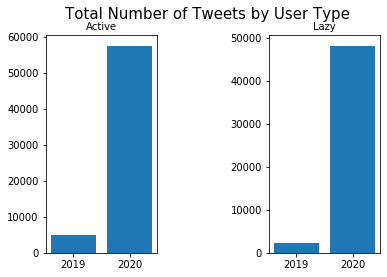

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2)
_ = plt.suptitle('Total Number of Tweets by User Type', fontsize=15)

y1 = [len(active19),len(active20)]
x1 = ['2019','2020']
ax1.bar(x1, y1)
_ = ax1.set_title('Active', fontsize=10)

y2 = [len(lazy19),len(lazy20)]
x2 = ['2019','2020']
ax2.bar(x2, y2)
_ = ax2.set_title('Lazy', fontsize=10)

_ = plt.subplots_adjust(wspace = 1.0)
plt.savefig(fname='Total Number of tweets by User Type')

As seen from the chart above, the same users tweeted much more in 2020 than in 2019 (excluding replies and retweets) in both user cohorts. This is a result of COVID stay at home orders and lockdowns.

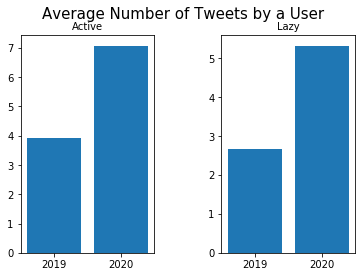

In [5]:

fig, (ax1, ax2) = plt.subplots(1,2)
_ = plt.suptitle('Average Number of Tweets by a User', fontsize=15)

y1 = [active19.groupby('Name')['Text'].count().mean(),active20.groupby('Name')['Text'].count().mean()]
x1 = ['2019','2020']
ax1.bar(x1, y1)
_ = ax1.set_title('Active', fontsize=10)
#xlocs1, xlabs1 = plt.xticks()
#_ = [plt.text(xlocs1[i1]-3.2, v1-0.9, round(float(v1),2)) for i1, v1 in enumerate(y1)]

y2 = [lazy19.groupby('Name')['Text'].count().mean(),lazy20.groupby('Name')['Text'].count().mean()]
x2 = ['2019','2020']
ax2.bar(x2, y2)
_ = ax2.set_title('Lazy', fontsize=10)
#xlocs2, xlabs2 = plt.xticks()
#_ = [plt.text(xlocs2[i2]-0.2, v2+0.05, round(float(v2),2)) for i2, v2 in enumerate(y2)]

_ = plt.subplots_adjust(wspace = 0.5, hspace = 0.3)#bottom = 0.01, top = 0.02)
plt.savefig(fname='Avg Number of Tweets by a User')

The average number of tweets per user increased by 1.5-2 times in 2020.

## Where the User Tweets Are Coming From?

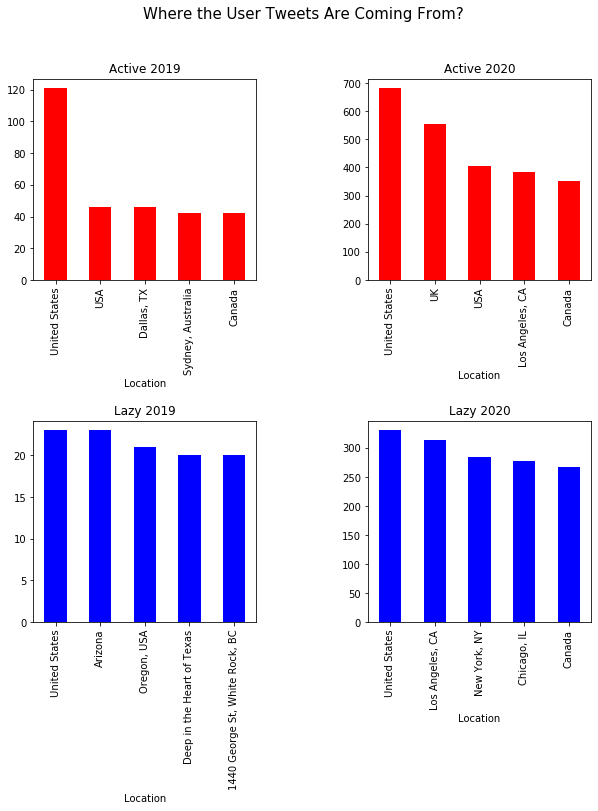

In [6]:
plt.figure(figsize=(10,10))
_ = plt.suptitle('Where the User Tweets Are Coming From?', fontsize=15)

plt.subplot(2,2,1)
_ = active19.groupby('Location')['Name'].count().sort_values(ascending=False).head(5).plot(kind='bar',color='red')
_ = plt.title('Active 2019')

plt.subplot(2,2,2)
_ = active20.groupby('Location')['Name'].count().sort_values(ascending=False).head(5).plot(kind='bar',color='red')
_ = plt.title('Active 2020')

plt.subplot(2,2,3)
_ = lazy19.groupby('Location')['Name'].count().sort_values(ascending=False).head(5).plot(kind='bar',color='blue')
_ = plt.title('Lazy 2019')

plt.subplot(2,2,4)
_ = lazy20.groupby('Location')['Name'].count().sort_values(ascending=False).head(5).plot(kind='bar',color='blue')
_ = plt.title('Lazy 2020')

_ = plt.subplots_adjust(wspace = 0.5, hspace = 0.7)
plt.savefig(fname='User Locations')

We searched Tweets on the English speaking Twitter. The active user cohort Tweets are from US, Canada and Sydney, Australia. The lazy user cohort Tweets are from US, Canada, UK and Philippines. Notably, Los Angeles was a top location in 2020 for both user cohorts.

## Twitter Text Characteristics

In [7]:
# functions to count text elements in Tweets:

def count_hashtags(df):
    hashtags_count=0
    for i in range(0,len(df)):
        if '#' in df.Text[i].split(' '):
            hashtags_count+=1
        else:
            continue
    return hashtags_count

def count_mentions(df):
    mentions_count=0
    for i in range(0,len(df)):
        if '@' in df.Text[i].split(' '):
            mentions_count+=1
        else:
            continue
    return mentions_count

def count_links(df):
    links_count=0
    for i in range(0,len(df)):
        if 'http' in df.Text[i]:
            links_count+=1
        else:
            continue
    return links_count

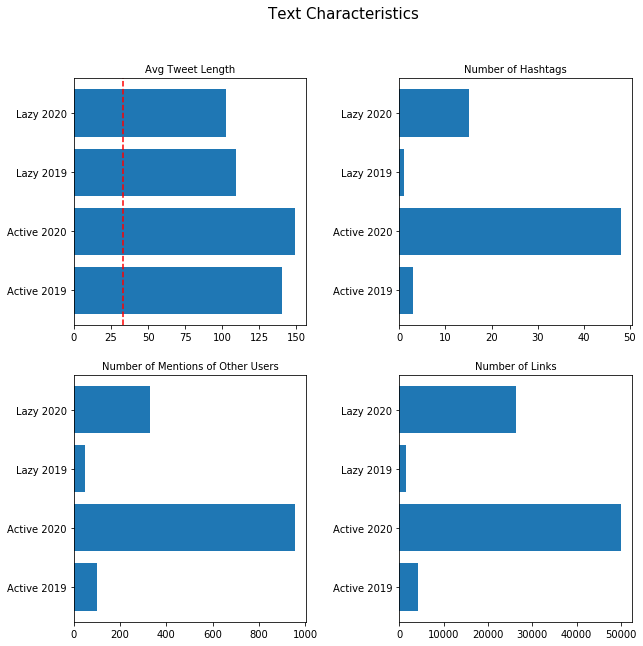

In [8]:
plt.figure(figsize=(10,10))
_ = plt.suptitle('Text Characteristics', fontsize=15)

plt.subplot(2,2,1)
x = np.array([active19.Text.apply(lambda x: len(x)).mean(), active20.Text.apply(lambda x: len(x)).mean(), lazy19.Text.apply(lambda x: len(x)).mean(),lazy20.Text.apply(lambda x: len(x)).mean()])
y = ['Active 2019','Active 2020','Lazy 2019', 'Lazy 2020']
_ = plt.barh(y, x)
_ = plt.title('Avg Tweet Length', fontsize=10)
_ = plt.axvline(33, ls='--', color='r')

plt.subplot(2,2,2)
x = [count_hashtags(active19),count_hashtags(active20),count_hashtags(lazy19),count_hashtags(lazy20)]
y = ['Active 2019','Active 2020','Lazy 2019', 'Lazy 2020']
_ = plt.barh(y, x)
_ = plt.title('Number of Hashtags', fontsize=10)
           
plt.subplot(2,2,3)
x = [count_mentions(active19),count_mentions(active20),count_mentions(lazy19),count_mentions(lazy20)]
y = ['Active 2019','Active 2020','Lazy 2019', 'Lazy 2020']
_ = plt.barh(y, x)
_ = plt.title('Number of Mentions of Other Users', fontsize=10)
           
plt.subplot(2,2,4)
x = [count_links(active19),count_links(active20),count_links(lazy19),count_links(lazy20)]
y = ['Active 2019','Active 2020','Lazy 2019', 'Lazy 2020']
_ = plt.barh(y, x)
_ = plt.title('Number of Links', fontsize=10)

_ = plt.subplots_adjust(wspace = 0.4, hspace = 0.2)
plt.savefig(fname='Text Characteristics')

User Tweets in an active cohort are about 30 characters longer than those in a lazy cohort. Active users use more mentions and links, which increases the length of their tweets. <br>
The Tweets in both cohorts are over 110 characters, which is quite lengthy considering that the average length of a Tweet in 2018 was 33 characters according to Techcrunch. <br>
Notably the length of tweets didn't increase in 2020 in any cohort, even though there is still way to go to the Twitter 280 character limit.

### Most Popular Words in Tweets

In [9]:
import collections
from collections import Counter

# combine list of words in clean tweets:
all_words_active19 = []
for i in range(0,len(active19)):
    for word in active19.clean_text[i].split(' '):
        all_words_active19.append(word)
all_words_active19 = list(filter(lambda a: a != '’', all_words_active19))

all_words_active20 = []
for i in range(0,len(active20)):
    try:
        for word in active20.clean_text[i].split(' '):
            all_words_active20.append(word)
    except:
        pass
all_words_active20 = list(filter(lambda a: a != '’', all_words_active20))

all_words_lazy19 = []
for i in range(0,len(lazy19)):
    try:
        for word in lazy19.clean_text[i].split(' '):
            all_words_lazy19.append(word)
    except:
        pass
all_words_lazy19 = list(filter(lambda a: a != '’', all_words_lazy19))
    
    
all_words_lazy20 = []
for i in range(0,len(lazy20)):
    try:
        for word in lazy20.clean_text[i].split(' '):
            all_words_lazy20.append(word)
    except:
        pass
all_words_lazy20 = list(filter(lambda a: a != '’', all_words_lazy20))

# Create counter of words in clean tweets
counts_active19 = collections.Counter(all_words_active19)
counts_active20 = collections.Counter(all_words_active20)
counts_lazy19 = collections.Counter(all_words_lazy19)
counts_lazy20 = collections.Counter(all_words_lazy20)

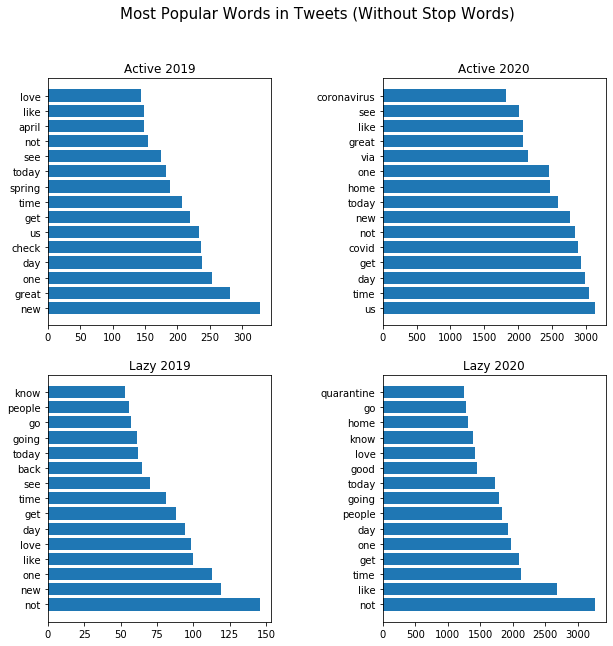

In [10]:
plt.figure(figsize=(10,10))
_ = plt.suptitle('Most Popular Words in Tweets (Without Stop Words)', fontsize=15)

plt.subplot(2,2,1)
x = []
y =[]
for i in range(0,15):
    y.append(counts_active19.most_common(15)[i][0])
    x.append(counts_active19.most_common(15)[i][1])
#WordCloud(width=10, height=40).generate(y)
_ = plt.barh(y, x)
_ = plt.title('Active 2019')

plt.subplot(2,2,2)
x = []
y =[]
for i in range(0,15):
    y.append(counts_active20.most_common(15)[i][0])
    x.append(counts_active20.most_common(15)[i][1])
_ = plt.barh(y, x)
_ = plt.title('Active 2020')

plt.subplot(2,2,3)
x = []
y =[]
for i in range(0,15):
    y.append(counts_lazy19.most_common(15)[i][0])
    x.append(counts_lazy19.most_common(15)[i][1])
_ = plt.barh(y, x)
_ = plt.title('Lazy 2019')

plt.subplot(2,2,4)
x = []
y =[]
for i in range(0,15):
    y.append(counts_lazy20.most_common(15)[i][0])
    x.append(counts_lazy20.most_common(15)[i][1])
_ = plt.barh(y, x)
_ = plt.title('Lazy 2020')

_ = plt.subplots_adjust(wspace = 0.5, hspace = 0.2)
plt.savefig(fname='Most Popular Words')

In [11]:
counts_lazy20.most_common(15)

[('not', 3270),
 ('like', 2679),
 ('time', 2127),
 ('get', 2101),
 ('one', 1979),
 ('day', 1936),
 ('people', 1831),
 ('going', 1790),
 ('today', 1729),
 ('good', 1447),
 ('love', 1418),
 ('know', 1395),
 ('home', 1308),
 ('go', 1289),
 ('quarantine', 1259)]

In 2019 the active cohort mentions words like 'spring' and 'april', while in 2020 they talk about 'home' and 'covid'. <br>
In 2019 the lazy cohort mentions words like 'game', while in 2020 they talk about 'people'.

## Word Clouds

In [12]:
# define a function to plot a wordcloud:
def make_wordcloud(words):
    the_wordcloud = WordCloud(max_words=1000, width=600, height=400).generate(words)
    _ = plt.figure(figsize=(10,8), facecolor='k')
    _ = plt.imshow(the_wordcloud)
    _ = plt.axis("off")
    _ = plt.tight_layout(pad=0)
    _ = plt.show()

#### Active 2019

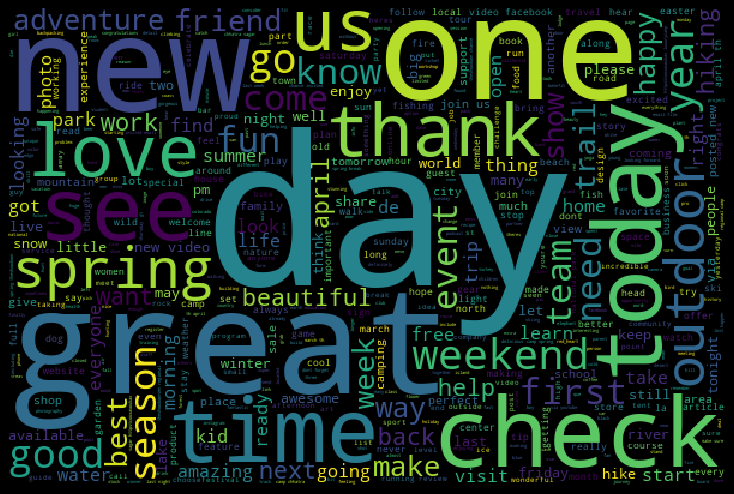

<Figure size 432x288 with 0 Axes>

In [13]:
active19_words=' '.join(active19.clean_text.astype(str))
make_wordcloud(active19_words)
_ = plt.savefig(fname='Wordcloud Active 19')

#### Active 2020

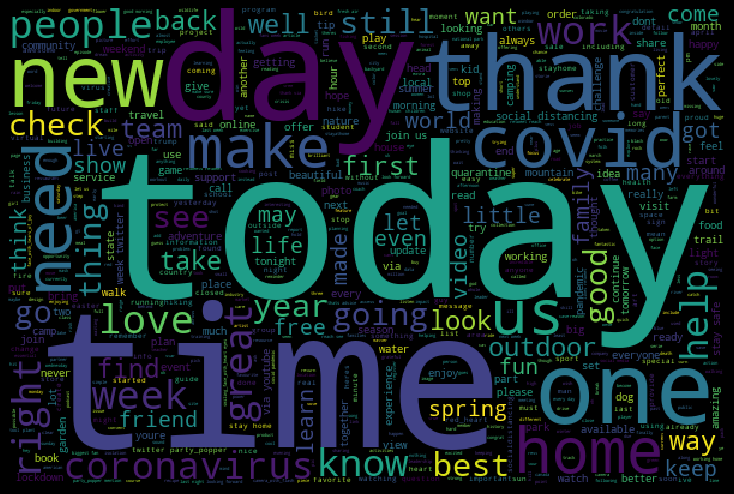

<Figure size 432x288 with 0 Axes>

In [14]:
active20_words=' '.join(active20.clean_text.astype(str))
make_wordcloud(active20_words)
_ = plt.savefig(fname='Wordcloud Active 20')

#### Lazy 2019

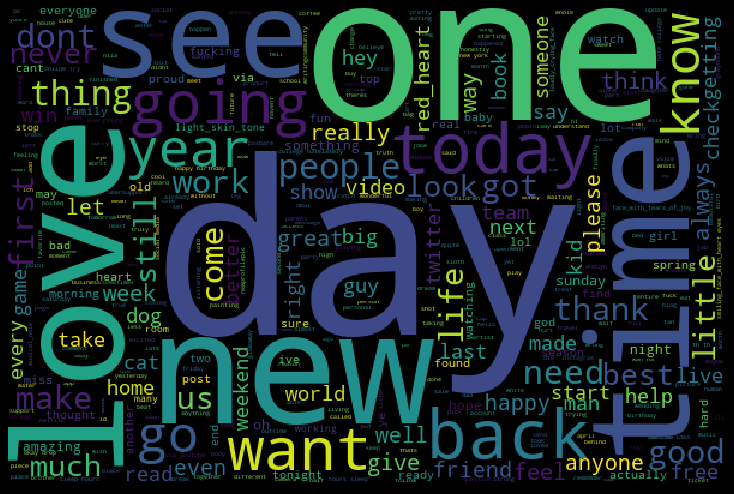

<Figure size 432x288 with 0 Axes>

In [15]:
lazy19_words=' '.join(lazy19.clean_text.astype(str))
make_wordcloud(lazy19_words)
_ = plt.savefig(fname='Wordcloud Lazy 19')

#### Lazy 2020

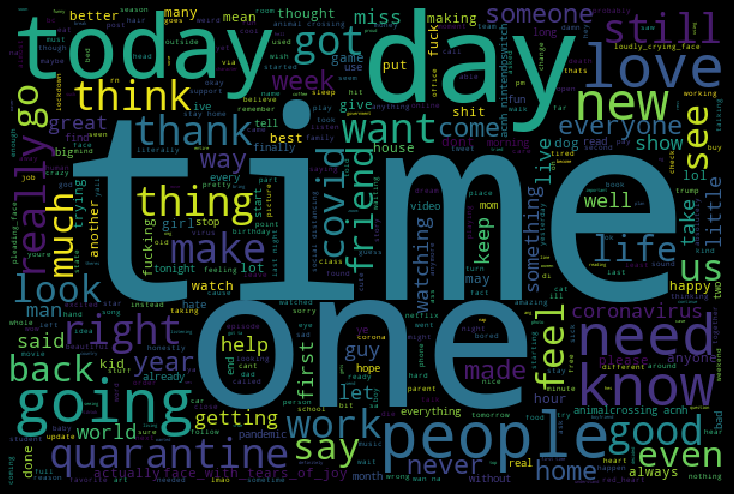

<Figure size 432x288 with 0 Axes>

In [16]:
lazy20_words=' '.join(lazy20.clean_text.astype(str))
make_wordcloud(lazy20_words)
_ = plt.savefig(fname='Wordcloud Lazy 20')

### Most Popular Emojis in Tweets

In [17]:
import emoji

def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [18]:
active19_words2 = ' '.join(active19.Text.astype(str))
active19_emojis = extract_emojis(active19_words2)
collections.Counter(active19_emojis).most_common(15)

[('🔥', 57),
 ('❤', 39),
 ('🏻', 38),
 ('🌸', 37),
 ('😂', 34),
 ('🎉', 31),
 ('😍', 30),
 ('❄', 29),
 ('🏼', 28),
 ('💪', 24),
 ('👏', 23),
 ('♀', 23),
 ('♂', 23),
 ('✨', 22),
 ('😎', 21)]

In [19]:
# to decode the unrecognized emojis:
print('emoji#4:',emoji.demojize(collections.Counter(active19_emojis).most_common(15)[2][0]),
      '\nemoji#8:',emoji.demojize(collections.Counter(active19_emojis).most_common(15)[8][0]))

emoji#4: :light_skin_tone: 
emoji#8: :medium_light_skin_tone:


In [20]:
active20_words2 = ' '.join(active20.Text.astype(str))
active20_emojis = extract_emojis(active20_words2)
collections.Counter(active20_emojis).most_common(15)

[('👏', 894),
 ('❤', 873),
 ('😂', 835),
 ('🏻', 515),
 ('🏼', 476),
 ('🎉', 475),
 ('🔥', 445),
 ('🤣', 420),
 ('🙏', 388),
 ('👍', 344),
 ('🙌', 338),
 ('📸', 330),
 ('👇', 328),
 ('😍', 326),
 ('📷', 266)]

In [21]:
# to decode the unrecognized emojis:
print('emoji#4:',emoji.demojize(collections.Counter(active20_emojis).most_common(15)[3][0]),
      '\nemoji#5:',emoji.demojize(collections.Counter(active19_emojis).most_common(15)[7][0]))

emoji#4: :light_skin_tone: 
emoji#5: :snowflake:


In [22]:
lazy19_words2 = ' '.join(lazy19.Text.astype(str))
lazy19_emojis = extract_emojis(lazy19_words2)
collections.Counter(lazy19_emojis).most_common(15)

[('❤', 61),
 ('😂', 57),
 ('😍', 41),
 ('🏼', 26),
 ('🤣', 23),
 ('😭', 22),
 ('♀', 21),
 ('🏻', 19),
 ('💕', 18),
 ('💔', 16),
 ('🙌', 15),
 ('🙏', 15),
 ('🎉', 14),
 ('🔥', 13),
 ('🏇', 12)]

In [23]:
print('emoji#5:',emoji.demojize(collections.Counter(lazy19_emojis).most_common(15)[4][0]),
      '\nemoji#8:',emoji.demojize(collections.Counter(lazy19_emojis).most_common(15)[7][0]))

emoji#5: :rolling_on_the_floor_laughing: 
emoji#8: :light_skin_tone:


In [24]:
lazy20_words2 = ' '.join(lazy20.Text.astype(str))
lazy20_emojis = extract_emojis(lazy20_words2)
collections.Counter(lazy20_emojis).most_common(15)

[('😂', 1747),
 ('😭', 1263),
 ('❤', 796),
 ('🤣', 655),
 ('🏻', 630),
 ('👏', 599),
 ('🏼', 548),
 ('🥺', 535),
 ('♀', 514),
 ('😍', 400),
 ('😩', 274),
 ('🤷', 266),
 ('🤦', 255),
 ('🔥', 253),
 ('🙃', 247)]

In [25]:
print('emoji#5:',emoji.demojize(collections.Counter(lazy20_emojis).most_common(15)[4][0]),
      '\nemoji#7:',emoji.demojize(collections.Counter(lazy20_emojis).most_common(15)[6][0]))

emoji#5: :light_skin_tone: 
emoji#7: :medium_light_skin_tone:
